In [1]:
import lbg_forecast.sps as sps
import lbg_forecast.sfh as sfh
import lbg_forecast.cosmology as cosmo
import lbg_forecast.emulator as em
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sps_model=sps.initialise_sps_model(neb_em=False)
mimic = em.fsps_emulator("./")

In [3]:
redshift=np.arange(0.01, 2.0, 0.02)
phot1 = []
phot9 = []
em1 = []
for z in redshift:
    
    sps_params = np.array([z, 0.1, 0.5, 0.1, 0.0, 1.0, -3, 0.0, 10**-2, 10, -1, np.random.uniform(-5, 5), 0, -1, -1, -1, 10**8])
    sps_param_resize = sps_params.reshape((1, sps_params.shape[0]))
    em1.append(mimic.mimic_photometry(sps_param_resize, 1)[0])

    sps.update_model(sps_model, sps_params, False, sfh.default_agebins())
    phot9.append(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap9(), lya_uncertainity=False, path="./"))
    phot1.append(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap1(), lya_uncertainity=False, path="./"))

phot1 = np.array(phot1)
phot9 = np.array(phot9)
em1 = np.array(em1)


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])


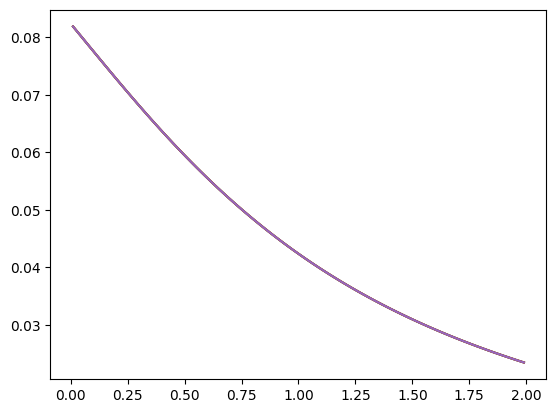

In [4]:
nbands=5
for i in range(nbands):
    diff = (phot9-phot1)[:, i]
    plt.plot(redshift, diff)

wmap1_to_9 = np.vstack((redshift, diff))
#np.savetxt("corrections/wmap1_to_9.txt", wmap1_to_9)

(23.0, 30.0)

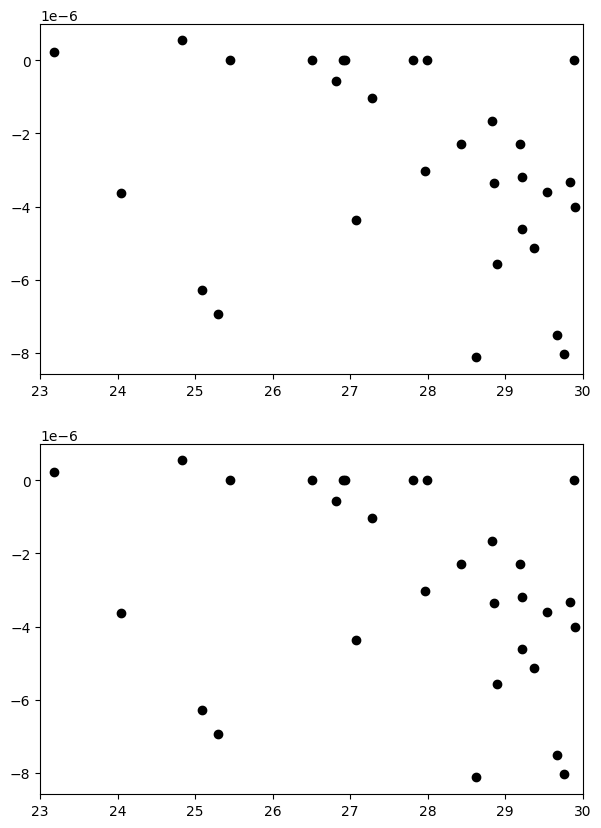

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 10))

diff = (phot9-phot1)[:, 0]


axes[0].scatter(phot9[:, 0], phot9[:, 0] - phot1[:, 0] - cosmo.wmap1_to_9(redshift), c="k")
#axes[1].plot(phot9[:, 0], phot9[:, 0] - phot1[:, 0], c="r")
axes[0].set_xlim(23, 30)
#axes[1].set_ylim(-0.01, 0.01)

#axes[2].plot(phot9[:, 0], phot9[:, 0] - em1[:, 0], c="r")
axes[1].scatter(phot9[:, 0], phot9[:, 0] - em1[:, 0] - cosmo.wmap1_to_9(redshift) - (phot1[:, 0] - em1[:, 0]), c="k")
axes[1].set_xlim(23, 30)
#axes[1].set_ylim(-0.01, 0.01)

In [6]:
sps_params = np.array([0.0153, 0.1, 0.5, 0.1, 0.0, 1.0, -3, 0.0, 10**-2, 10, -1, -1, 0, -1, -1, -1, 10**8])
sps_param_resize = sps_params.reshape((1, sps_params.shape[0]))


photem = mimic.mimic_photometry(sps_param_resize, 1)
sps.update_model(sps_model, sps_params, False, sfh.default_agebins())
photo9 = sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap9(), lya_uncertainity=False, path="./")
photo1 = sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap1(), lya_uncertainity=False, path="./")

print(photem[0][0]+cosmo.wmap1_to_9(0.0153), photo1[0]+cosmo.wmap1_to_9(0.0153), photo9[0])

23.21100763964744 23.31361488035452 23.313615155318455
